In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
from vega_datasets import data
df = data.sf_temps()

### Use the above dataset for the exercises below:

- 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
- 2. Write the code necessary to visualize the minimum temperature over time.
- 3. Write the code necessary to visualize the maximum temperature over time.
- 4. Which month is the coldest, on average?
- 5. Which month has the highest average temperature?
- 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
df = df.set_index('date').sort_index()

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

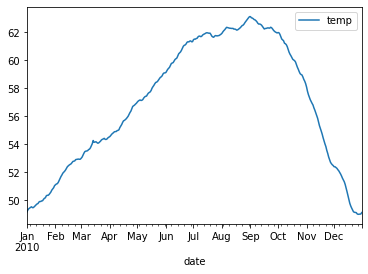

In [7]:
df.resample('D').mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

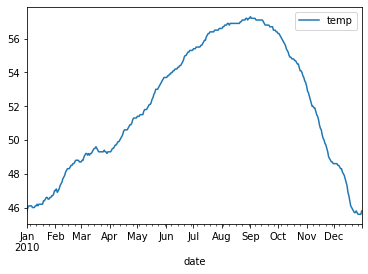

In [8]:
df.resample('D').min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

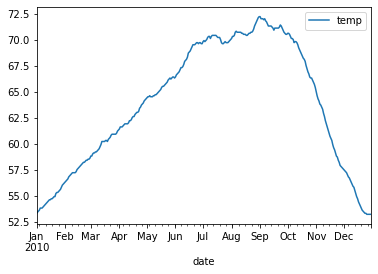

In [9]:
df.resample('D').max().plot()

Which month is the coldest, on average?

In [10]:
df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


Which month has the highest average temperature

In [11]:
df.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
day_v = df.resample('D').agg(['min', 'max'])

In [13]:
day_v

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [14]:
day_v['max-min']  = day_v.temp['max'] - day_v.temp['min']

In [15]:
day_v.sort_values(['max-min']).tail(1)

temp       max-min
             min   max        
date                          
2010-08-31  57.2  72.2    15.0

  Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

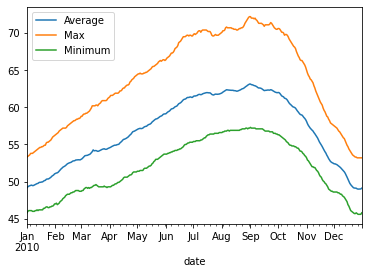

In [16]:
df.resample('D').temp.mean().plot(label='Average')
df.resample('D').temp.max().plot(label='Max')
df.resample('D').temp.min().plot(label='Minimum')
plt.legend()
plt.show()

In [18]:
from vega_datasets import data
seattle=data.seattle_weather()

### Use the dataset to answer the following questions:

- 1. Which year and month combination has the highest amount of precipitation?
- 2. Visualize the amount of monthly precipitation over time.
- 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- 4. Which year-month combination is the windiest?
- 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- 6. In which month does it rain the most?
- 7. Which month has the most number of days with a non-zero amount of precipitation?


In [20]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [23]:
seattle = seattle.set_index('date').sort_index()

Which year and month combination has the highest amount of precipitation?

In [30]:
 seattle.resample('m').mean().sort_values(by='precipitation').tail(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


Visualize the amount of monthly precipitation over time

<AxesSubplot:xlabel='date'>

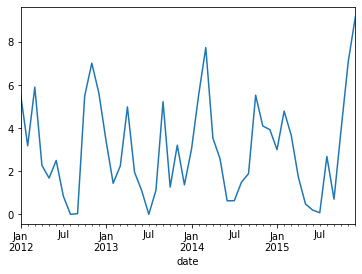

In [36]:
seattle.resample('m').precipitation.mean().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

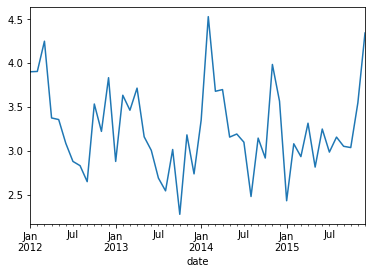

In [37]:
seattle.resample('m').wind.mean().plot()

In [ ]:
seattle.resample()